# Natural Language Processing Fundamentals in Python

## CHAPTER 1


### Introduction to Regular Expressions

In [1]:
import re

In [3]:
re.match('abc', 'abcdef')

<_sre.SRE_Match object; span=(0, 3), match='abc'>

In [6]:
word_regex = '\w+'
re.match(word_regex, 'hi there!')

<_sre.SRE_Match object; span=(0, 2), match='hi'>

In [8]:
re.split('\s+', 'Split on spaces.')

['Split', 'on', 'spaces.']

### Introduction to Tokenization

In [18]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\knock\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
word_tokenize("Hi there!")

['Hi', 'there', '!']

In [22]:
import re

In [23]:
re.match('abc', 'abcde')

<_sre.SRE_Match object; span=(0, 3), match='abc'>

In [25]:
re.search('abc', 'abcde')

<_sre.SRE_Match object; span=(0, 3), match='abc'>

In [26]:
re.match('cd', 'abcde')

In [27]:
re.search('cd', 'abcde')

<_sre.SRE_Match object; span=(2, 4), match='cd'>

### Advanced Tokenization with regex

In [29]:
import re

In [31]:
match_digits_and_words = ('(\d+|\w+)')

In [34]:
re.findall(match_digits_and_words, 'He has 11 cats.')

['He', 'has', '11', 'cats']

In [35]:
import re

In [36]:
my_str = 'match lowercase spaces nums like 12, but no commas'

In [37]:
re.match('[a-z0-9 ]+', my_str)

<_sre.SRE_Match object; span=(0, 35), match='match lowercase spaces nums like 12'>

### Charting Word Length with nltk

In [39]:
from matplotlib import pyplot as plt

(array([1., 0., 0., 0., 0., 2., 0., 3., 0., 1.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. , 5.8, 6.6, 7.4, 8.2, 9. ]),
 <a list of 10 Patch objects>)

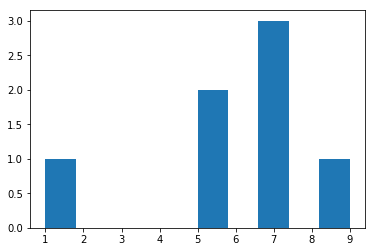

In [40]:
plt.hist([1,5,5,7,7,7,9])

In [41]:
plt.show()

In [42]:
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize

In [44]:
words = word_tokenize("This is a pretty cool tool!")

In [46]:
word_lengths = [len(w) for w in words]

(array([2., 0., 1., 0., 0., 0., 3., 0., 0., 1.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <a list of 10 Patch objects>)

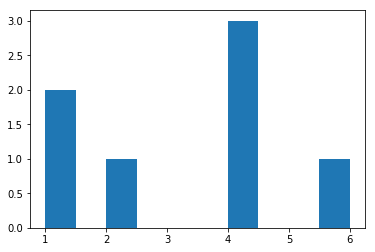

In [47]:
plt.hist(word_lengths)

## CHAPTER 2

### Word counts with bag-of-words

In [36]:
from nltk.tokenize import word_tokenize

In [37]:
from collections import Counter

In [38]:
Counter(word_tokenize("""The cat is in the box. The cat likes the box. The box is over the cat."""))

Counter({'The': 3,
         'cat': 3,
         'is': 2,
         'in': 1,
         'the': 3,
         'box': 3,
         '.': 3,
         'likes': 1,
         'over': 1})

### Simple text preprocessing

In [28]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\knock\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
text = """The cat is in the box. The cat likes the box. The box is over the cat."""

In [32]:
tokens = [w for w in word_tokenize(text.lower()) if w.isalpha()] # only returns alphabetic strings
# take each token from the word_tokenize output of the lower case text if it contains only alphabetical characters

['the', 'cat', 'is', 'in', 'the', 'box', 'the', 'cat', 'likes', 'the', 'box', 'the', 'box', 'is', 'over', 'the', 'cat']


In [35]:
no_stops = [t for t in tokens if t not in stopwords.words('english')]

In [67]:
Counter(no_stops).most_common(2)

[('cat', 3), ('box', 3)]

### Intoduction to gensim

In [6]:
import gensim
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import word_tokenize

In [76]:
my_documents = ['The movie was about a spaceship and aliens.',
                'I really liked the movie!',
               'Awesome action scenes, but boring characters.',
               'The movie was awful! I hate alien films.',
               'Space is cool! I liked the movie.',
               'More space films, please!']

In [77]:
tokenized_docs = [word_tokenize(doc.lower()) for doc in my_documents]

In [79]:
dictionary = Dictionary(tokenized_docs)

In [80]:
dictionary.token2id

{'.': 0,
 'a': 1,
 'about': 2,
 'aliens': 3,
 'and': 4,
 'movie': 5,
 'spaceship': 6,
 'the': 7,
 'was': 8,
 '!': 9,
 'i': 10,
 'liked': 11,
 'really': 12,
 ',': 13,
 'action': 14,
 'awesome': 15,
 'boring': 16,
 'but': 17,
 'characters': 18,
 'scenes': 19,
 'alien': 20,
 'awful': 21,
 'films': 22,
 'hate': 23,
 'cool': 24,
 'is': 25,
 'space': 26,
 'more': 27,
 'please': 28}

In [81]:
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

In [82]:
corpus # token id, token freq

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(0, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(0, 1),
  (5, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1)],
 [(0, 1), (5, 1), (7, 1), (9, 1), (10, 1), (11, 1), (24, 1), (25, 1), (26, 1)],
 [(9, 1), (13, 1), (22, 1), (26, 1), (27, 1), (28, 1)]]

### Tf-idf with gensim

In [83]:
# tf-idf = term freuqncy - inverse document frequency
# allows you to determine the most important words in each document
# each corpus may have shared words beyond just stopwords
# these words should be down-weighted in importance
# example from astronomy: 'sky'
# ensures most common words don't show up as key words
# keeps document specific frequenct words weighted high

from gensim.models.tfidfmodel import TfidfModel
tfidf = TfidfModel(corpus)
tfidf[corpus[1]]

[(5, 0.1746298276735174),
 (7, 0.1746298276735174),
 (9, 0.1746298276735174),
 (10, 0.29853166221463673),
 (11, 0.47316148988815415),
 (12, 0.7716931521027908)]

## CHAPTER 3

### Named Entity Recognition

In [3]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\knock\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\knock\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\knock\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [4]:
sentence = '''In New York, I like to ride the Metro to visit MOMA and some restaurants rated well by Ruth Reichl.'''

In [6]:
tokenized_sent = nltk.word_tokenize(sentence)
tokenized_sent

['In',
 'New',
 'York',
 ',',
 'I',
 'like',
 'to',
 'ride',
 'the',
 'Metro',
 'to',
 'visit',
 'MOMA',
 'and',
 'some',
 'restaurants',
 'rated',
 'well',
 'by',
 'Ruth',
 'Reichl',
 '.']

In [8]:
tagged_sent = nltk.pos_tag(tokenized_sent)
tagged_sent

[('In', 'IN'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 (',', ','),
 ('I', 'PRP'),
 ('like', 'VBP'),
 ('to', 'TO'),
 ('ride', 'VB'),
 ('the', 'DT'),
 ('Metro', 'NNP'),
 ('to', 'TO'),
 ('visit', 'VB'),
 ('MOMA', 'NNP'),
 ('and', 'CC'),
 ('some', 'DT'),
 ('restaurants', 'NNS'),
 ('rated', 'VBN'),
 ('well', 'RB'),
 ('by', 'IN'),
 ('Ruth', 'NNP'),
 ('Reichl', 'NNP'),
 ('.', '.')]

In [93]:
tagged_sent[:3]

[('In', 'IN'), ('New', 'NNP'), ('York', 'NNP')]

In [99]:
print(nltk.ne_chunk(tagged_sent))

(S
  In/IN
  (GPE New/NNP York/NNP)
  ,/,
  I/PRP
  like/VBP
  to/TO
  ride/VB
  the/DT
  (ORGANIZATION Metro/NNP)
  to/TO
  visit/VB
  (ORGANIZATION MOMA/NNP)
  and/CC
  some/DT
  restaurants/NNS
  rated/VBN
  well/RB
  by/IN
  (PERSON Ruth/NNP Reichl/NNP)
  ./.)


### Introduction to SpaCy

In [1]:
import spacy # this is a bitch to install

In [3]:
nlp = spacy.load("en_core_web_sm")

In [4]:
nlp.entity

In [5]:
doc = nlp("""Berlin is the capital of Germany; and the residence of Chancellor Angela Merkel.""")

In [6]:
doc.ents

(Berlin, Germany, Angela Merkel)

In [8]:
print(doc.ents[0], doc.ents[0].label_)

Berlin GPE


### Multilingual NER with Polyglot

In [10]:
# polyglot is unstable on Windows and requires some shenanigans to install so I'll come back to it later

### Classifying fake news using supervised learning with NLP

In [11]:
# Supervised learning with NLP

## Need to use language instead of geometric features
## scikit-learn: Powerful open-source library
## How to create supervised learning data from text?
#### Use bag-of-words models or tf-idf as features

# Supervised learning steps

## Collect and preprocess our data
## Determine a label (e.g. movie genre)
## Split data into trianing and test sets
## Extract features from the text to help predict the label
#### Bag-of-words vector built into scikit-learn
## Evaluate trained model using the test set

# Ideas for Alpha data

## Choose a component
## Grab level 2 data where that component is labelled
## Label this with 1 in response variable
## Grab level 2 data where that component is labelled differently
## Label this with 0 in response variable
## Split data into trianing and test sets
## Extract features from Level 2 text
## Evaluate trained model with test set

### Building word count vectors with scikit-learn

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
# df = ...# load data into dataframe

In [18]:
# y = df['Sci-Fi']

In [19]:
#X_train, X_test, y_train, y_test = train_test_split(df['plot'], y, test_siize = 0.33, random_state = 53)

In [20]:
#count_vectorizer = CountVectorizer(stop_words = 'english')

In [22]:
#count_train = count_vectorizer.fit_transform(X_train.value)

In [23]:
#count_test = count_vectorizer.transform(X_test.Values)

### Training and testing a classification model with scikit-learn

In [10]:
# Naive Bayes Model
## Commonly used for testing NLP classification problems
## Basis in probability

# Given a particular piece of data, how likely is a particular outcome?
## If the plot has a spaceship, how likely is it to be sci-fi?
## Given a spaceship and and alien, how likely now is it sci-fi?

# Each word from CountVectorizer acts as a feature

# Naive Bayes: Simple and effective

In [11]:
from sklearn.naive_bayes import MultinomialNB

In [12]:
from sklearn import metrics

In [13]:
#nb_classifier = MultinomialNB()

In [24]:
#nb_classifier.fit(count_train, y_train)

In [25]:
#pred = nb_classifier.predict(count_test)

In [26]:
#metrics.accuracy_score(y_test, pred)

In [27]:
#metrics.confusion_matrix(y_test, pred, labels = [0,1])

### Simple NLP, Complex Problems